In [3]:
from src.extra_special import * 
from src.misc import *

import numpy as np
import scipy.constants as const
import scipy.special as sp
from scipy import integrate
#from icecream import ic

import matplotlib.pyplot as plt
import matplotlib.patheffects as pe  # for text effects 
plt.rcParams.update({'font.size': 18})

Z_0 = np.sqrt(const.mu_0 / const.epsilon_0)  # vacuum impedance

$$
\frac{\int_0^{\infty} d r \cdot 2 r^2 |z_j|^2}{\int_0^{\infty} d r \cdot r^2 \left( |z_j|^2 + \frac{j+1}{2j+1} |z_{j-1}|^2 + \frac{j}{2j+1} |z_{j+1}|^2\right)} = 1
$$
where
$$
z_j = \begin{cases}
j_j(n_{\text{in}}k_0 r), & r \leq a \\
h^{(1)}_j(n_{\text{out}}k_0 r) , & r> a
\end{cases}
$$

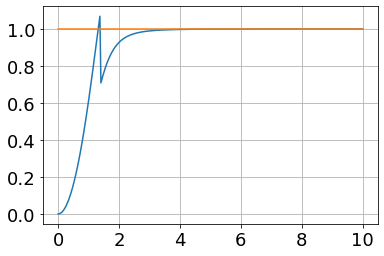

In [4]:
rr = np.linspace(1e-6, stop=10, num=300)

a = 1.4
n_in = 3
n_out = 2

j = 3

k0 = 1

def num(r, j, k0, a, n_in, n_out):
    zj = np.where(
        r <= a,
        sp.spherical_jn(j, n_in*r*k0),
        spherical_h1(j, n_out*r*k0)
    )
    return 2 * r**2 * np.abs(zj)**2

def den(r, j, k0, a, n_in, n_out):
    zj = np.where(
        r <= a,
        sp.spherical_jn(j, n_in*r*k0),
        spherical_h1(j, n_out*r*k0)
    )
    zjm1 = np.where(
        r <= a,
        sp.spherical_jn(j-1, n_in*r*k0),
        spherical_h1(j-1, n_out*r*k0)
    )
    zjp1 = np.where(
        r <= a,
        sp.spherical_jn(j+1, n_in*r*k0),
        spherical_h1(j+1, n_out*r*k0)
    )
    
    return r**2 * (np.abs(zj)**2 + (j+1)/(2*j+1) * np.abs(zjm1)**2 + j/(2*j+1) * np.abs(zjp1)**2)


prms = (j, k0, a, n_in, n_out)
plt.plot(rr, num(rr, *prms)/den(rr, *prms))
plt.plot(rr, rr/rr)
#plt.legend()
plt.grid()
plt.show()

In [44]:
def get_int_val(j, k0, a, n_in, n_out, rmin=0, rmax=100):
    ranges = [[rmin, rmax]]
    
    prms = (j, k0, a, n_in, n_out)
    
    int_num = integrate.nquad(
        lambda r: num(r, *prms), 
        ranges,
        opts={'epsrel':1e-4}    
    )[0] 
    int_den = integrate.nquad(
        lambda r: den(r, *prms), 
        ranges,
        opts={'epsrel':1e-4}    
    )[0] 
    
    return int_num / int_den 

In [53]:
rrmax = 10**np.linspace(1, stop=5, num=30)

j = 1
k0 = 1
a = 1
n_in = 3+1j
n_out = 1.4

int_vals = []
for rmax in rrmax:
    int_vals.append(get_int_val(j, k0, a, n_in, n_out, rmax=rmax))

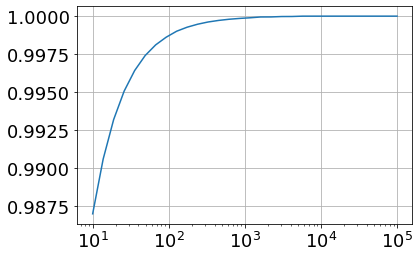

In [54]:
plt.plot(rrmax, int_vals)
plt.xscale('log')
plt.grid()
plt.show()